## 3.1 Data Processing

## 1. Financial Data

In [51]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import missingno as msno  # missingno库提供了一个很好的可视化缺失数据的方式
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import statsmodels.api as sm


In [52]:
def debug_print_data_info(dataframe):
    print("Data shape:", dataframe.shape)
    print("Data head:")
    print(dataframe.head())
    print("Data tail:")
    print(dataframe.tail())
    print("Data info:")
    print(dataframe.info())
    print("Missing values:")
    print(dataframe.isnull().sum())
    print(dataframe.columns.tolist())

In [53]:
# Load the CSV file to examine its content
fin_data = pd.read_csv('2014-2024 Buffet Portfolio - financial ratios.csv')
fin_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gvkey            4711 non-null   int64  
 1   permno           4711 non-null   int64  
 2   adate            4701 non-null   object 
 3   qdate            4711 non-null   object 
 4   public_date      4711 non-null   object 
 5   CAPEI            4642 non-null   float64
 6   bm               4397 non-null   float64
 7   evm              4701 non-null   float64
 8   pe_op_basic      4640 non-null   float64
 9   pe_op_dil        4640 non-null   float64
 10  pe_exi           4640 non-null   float64
 11  pe_inc           4640 non-null   float64
 12  ps               4701 non-null   float64
 13  pcf              4680 non-null   float64
 14  dpr              4234 non-null   float64
 15  npm              4701 non-null   float64
 16  opmbd            4701 non-null   float64
 17  opmad         

In [54]:
# Converting 'public_date' into datetime type
fin_data['public_date'] = pd.to_datetime(fin_data['public_date'])

# Dropping unnecessary columns
columns_to_drop = ['gvkey', 'permno', 'adate', 'qdate', 'cusip']
fin_data = fin_data.drop(columns=columns_to_drop)

# Displaying the first few rows of the cleaned data
fin_data.head()

,public_date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,...,sale_equity,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,TICKER
0,2010-01-31,23.091,0.202,12.573,9.688,9.688,10.046,10.046,4.107,15.381,...,1.388,15.193,0.0,0.094,0.0,-0.042,5.013,1.519,3.02%,KO
1,2010-02-28,21.273,0.201,14.863,17.342,17.457,17.993,17.993,3.921,14.846,...,1.250,8.091,0.0,0.090,0.0,-0.031,4.607,1.609,3.11%,KO
2,2010-03-31,22.193,0.201,14.863,18.092,18.212,18.771,18.771,4.091,15.488,...,1.250,8.091,0.0,0.090,0.0,-0.031,4.806,1.679,3.20%,KO
3,2010-04-30,21.585,0.201,14.863,17.582,17.699,18.242,18.242,3.979,15.064,...,1.250,8.091,0.0,0.090,0.0,-0.031,4.675,1.632,3.29%,KO
4,2010-05-31,20.947,0.208,13.336,7.957,8.082,8.454,8.454,3.783,13.726,...,1.297,9.058,0.0,0.090,0.0,-0.033,4.500,0.708,3.42%,KO


In [55]:
# Identify columns that may contain percentage signs or non-numeric values
for col in fin_data.columns:
    if fin_data[col].dtype == 'object':
        try:
            fin_data[col] = fin_data[col].str.replace('%', '').astype(float) / 100
        except Exception as e:
            print(f"Issue with column {col}: {e}")

fin_data.info()

Issue with column TICKER: could not convert string to float: 'KO'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   public_date      4711 non-null   datetime64[ns]
 1   CAPEI            4642 non-null   float64       
 2   bm               4397 non-null   float64       
 3   evm              4701 non-null   float64       
 4   pe_op_basic      4640 non-null   float64       
 5   pe_op_dil        4640 non-null   float64       
 6   pe_exi           4640 non-null   float64       
 7   pe_inc           4640 non-null   float64       
 8   ps               4701 non-null   float64       
 9   pcf              4680 non-null   float64       
 10  dpr              4234 non-null   float64       
 11  npm              4701 non-null   float64       
 12  opmbd            4701 non-null   float64       
 13  opmad            4701 non-n

## Missing Data

CAPEI             69
bm               314
evm               10
pe_op_basic       71
pe_op_dil         71
                ... 
accrual           31
ptb              314
PEG_trailing    1660
divyield        1756
TICKER            12
Length: 70, dtype: int64
缺失值比例：
cash_conversion    0.512842
sale_nwc           0.473785
divyield           0.372745
PEG_trailing       0.352367
inv_turn           0.296328
                     ...   
staff_sale         0.002123
opmbd              0.002123
npm                0.002123
ps                 0.002123
evm                0.002123
Length: 70, dtype: float64


<Figure size 600x500 with 0 Axes>

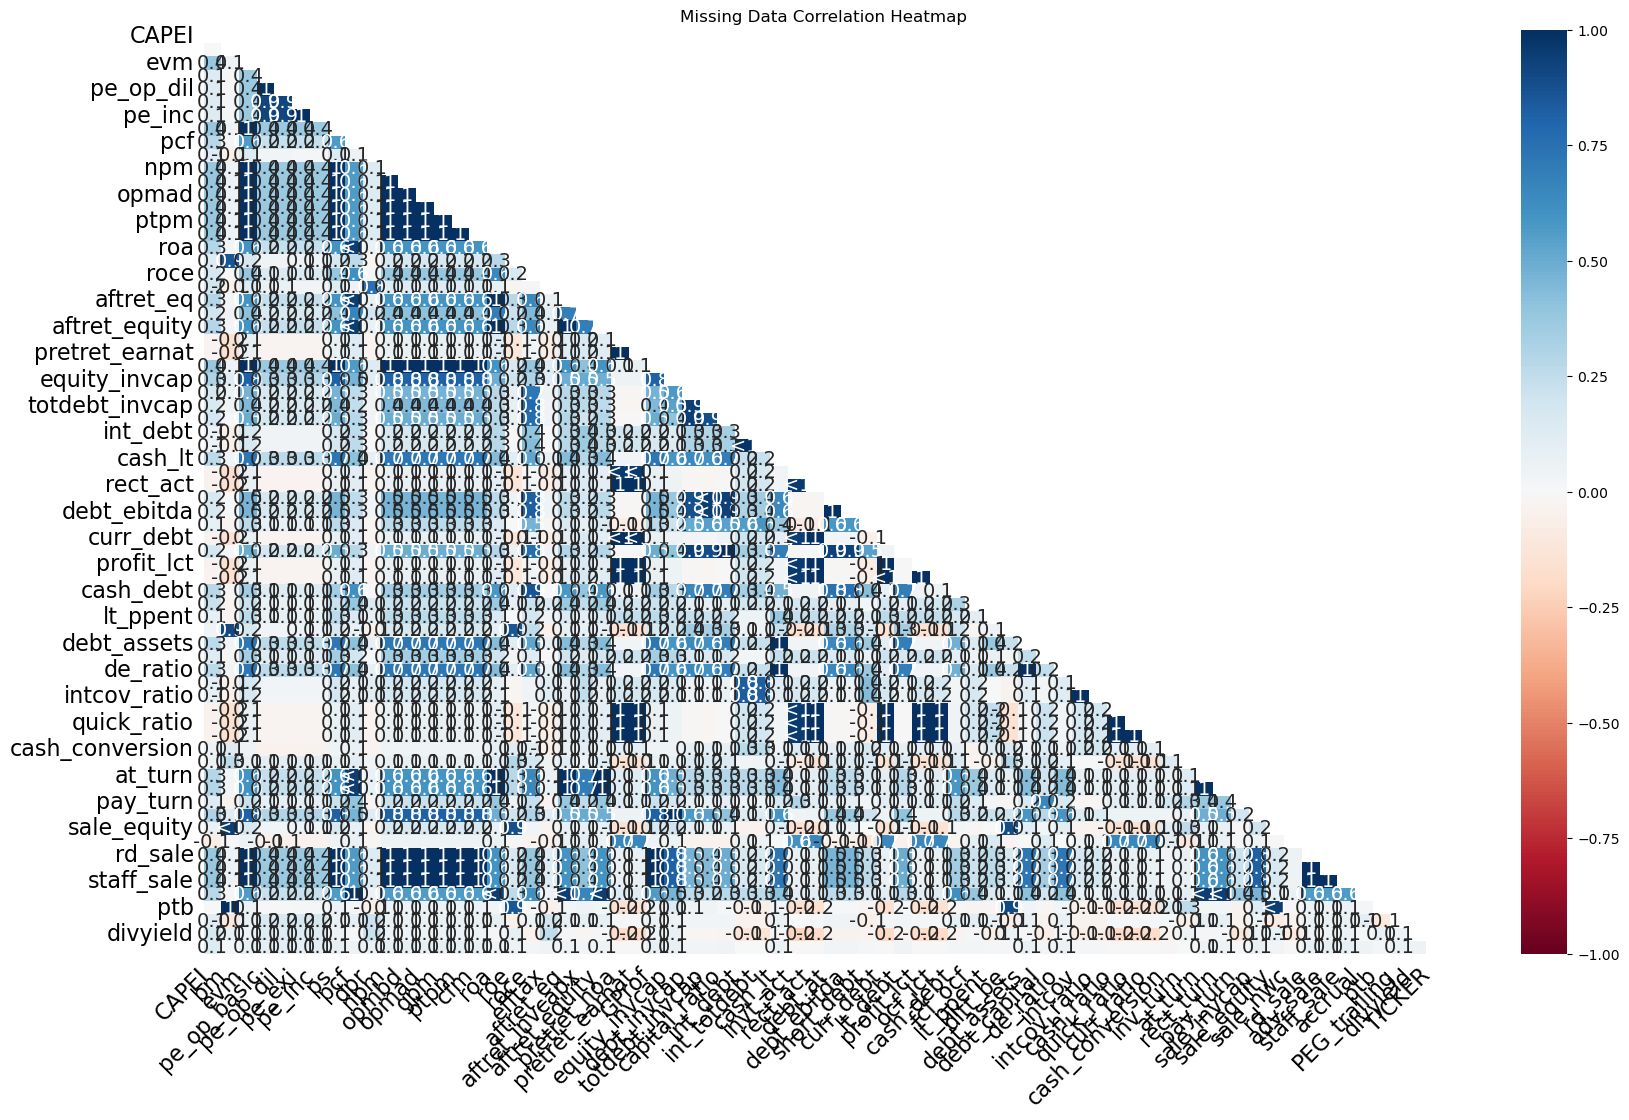

In [56]:
# Check the missing in the data
missing_values = fin_data.isnull().sum()
print(missing_values[missing_values > 0])

# Compute the missing ratio for each column
missing_ratios = fin_data.isnull().mean().sort_values(ascending=False)
print("缺失值比例：")
print(missing_ratios[missing_ratios > 0])  # 只显示有缺失值的变量

# Visualize the missing data
plt.figure(figsize=(60, 50))
msno.heatmap(fin_data)
plt.title('Missing Data Correlation Heatmap')
plt.show()


In [57]:
fin_data = fin_data.sort_index()

# 1. High missing rate group
high_missing_cols = ['cash_conversion', 'sale_nwc']
for col in high_missing_cols:
    # 使用时间窗口的中位数填充
    fin_data[col] = fin_data[col].fillna(fin_data[col].rolling(window=30, min_periods=1, center=True).median())
    # 对于开始和结束的缺失值，使用全局中位数填充
    fin_data[col] = fin_data[col].fillna(fin_data[col].median())

fin_data['divyield'] = fin_data['divyield'].fillna(0)

# 2. 中等缺失率组处理
med_missing_cols = ['invt_act', 'inv_turn', 'curr_ratio', 'quick_ratio', 'cash_ratio', 
                    'ocf_lct', 'profit_lct', 'curr_debt', 'pretret_earnat', 'pretret_noa', 'rect_act',
                    'PEG_trailing']
for col in med_missing_cols:
    # 先进行前向填充
    fin_data[col] = fin_data[col].fillna(method='ffill', limit=5)
    # 然后使用时间窗口的中位数填充
    fin_data[col] = fin_data[col].fillna(fin_data[col].rolling(window=30, min_periods=1, center=True).median())
    # 对于仍然存在的缺失值，使用全局中位数填充
    fin_data[col] = fin_data[col].fillna(fin_data[col].median())

# 3. 低缺失率组处理
low_missing_cols = ['sale_equity', 'int_totdebt', 'int_debt', 'intcov_ratio', 'ptb', 'bm']
for col in low_missing_cols:
    # 使用前向填充，然后后向填充
    fin_data[col] = fin_data[col].fillna(method='ffill').fillna(method='bfill')

# 4. 极低缺失率组处理
very_low_missing_cols = ['debt_ebitda', 'pe_inc', 'pe_op_dil', 'pe_op_basic', 'pe_exi']
for col in very_low_missing_cols:
    # 使用简单的线性插值
    fin_data[col] = fin_data[col].interpolate()

# 5. 对剩余的数值型变量使用线性填充
numeric_columns = fin_data.select_dtypes(include=[np.number]).columns.tolist()
imputer = SimpleImputer(strategy='median')
fin_data[numeric_columns] = imputer.fit_transform(fin_data[numeric_columns])

# 6. 处理任何剩余的缺失值
non_numeric_columns = fin_data.select_dtypes(exclude=[np.number]).columns.tolist()
mode_imputer = SimpleImputer(strategy='most_frequent')
fin_data[non_numeric_columns] = mode_imputer.fit_transform(fin_data[non_numeric_columns])

# 7. 检查是否还有剩余的缺失值
remaining_missing = fin_data.isnull().sum()
print("Remaining missing values:\n", remaining_missing[remaining_missing > 0])

print("Data preparation completed.")

Remaining missing values:
 Series([], dtype: int64)
Data preparation completed.


/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/2244966098.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fin_data[col] = fin_data[col].fillna(method='ffill', limit=5)
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/2244966098.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fin_data[col] = fin_data[col].fillna(method='ffill', limit=5)
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/2244966098.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fin_data[col] = fin_data[col].fillna(method='ffill', limit=5)
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/2244966098.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a 

In [58]:
fin_data.to_csv('check_fin_data_after_handle_missing_values.csv')

In [59]:
debug_print_data_info(fin_data)

Data shape: (4711, 71)
Data head:
  public_date   CAPEI     bm     evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc  \
0  2010-01-31  23.091  0.202  12.573        9.688      9.688  10.046  10.046   
1  2010-02-28  21.273  0.201  14.863       17.342     17.457  17.993  17.993   
2  2010-03-31  22.193  0.201  14.863       18.092     18.212  18.771  18.771   
3  2010-04-30  21.585  0.201  14.863       17.582     17.699  18.242  18.242   
4  2010-05-31  20.947  0.208  13.336        7.957      8.082   8.454   8.454   

      ps     pcf  ...  sale_equity  sale_nwc  rd_sale  adv_sale  staff_sale  \
0  4.107  15.381  ...        1.388    15.193      0.0     0.094         0.0   
1  3.921  14.846  ...        1.250     8.091      0.0     0.090         0.0   
2  4.091  15.488  ...        1.250     8.091      0.0     0.090         0.0   
3  3.979  15.064  ...        1.250     8.091      0.0     0.090         0.0   
4  3.783  13.726  ...        1.297     9.058      0.0     0.090         0.0   

   accrual

## 2. Stock Data

In [60]:
# Load the CSV file to examine its content
sto_data = pd.read_csv('2014-2024 Buffet Portfolio - stock.csv')
sto_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89589 entries, 0 to 89588
Data columns (total 63 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERMNO    89589 non-null  int64  
 1   date      89589 non-null  object 
 2   NAMEENDT  127 non-null    object 
 3   SHRCD     89589 non-null  int64  
 4   EXCHCD    89589 non-null  int64  
 5   SICCD     89589 non-null  object 
 6   NCUSIP    89589 non-null  object 
 7   TICKER    89589 non-null  object 
 8   COMNAM    89589 non-null  object 
 9   SHRCLS    24210 non-null  object 
 10  TSYMBOL   89589 non-null  object 
 11  NAICS     89563 non-null  float64
 12  PRIMEXCH  89589 non-null  object 
 13  TRDSTAT   89589 non-null  object 
 14  SECSTAT   89589 non-null  object 
 15  PERMCO    89589 non-null  int64  
 16  ISSUNO    89589 non-null  int64  
 17  HEXCD     89589 non-null  int64  
 18  HSICCD    89589 non-null  int64  
 19  CUSIP     89589 non-null  object 
 20  DCLRDT    931 non-null    ob

/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/2186852109.py:2: DtypeWarning: Columns (5,9,22,49,57) have mixed types. Specify dtype option on import or set low_memory=False.
  sto_data = pd.read_csv('2014-2024 Buffet Portfolio - stock.csv')


In [61]:
sto_data_selected = sto_data.copy()
sto_data_selected['date'] = pd.to_datetime(sto_data_selected['date'])

In [62]:
# 步骤1: 处理因变量(投资回报率)
def clean_ret(ret):
    if isinstance(ret, str):
        # 处理特殊情况，如'C'或'B'
        if ret in ['C', 'B']:
            return np.nan
        # 移除百分号并转换为浮点数
        return float(ret.strip('%')) / 100
    return ret

# 将'RET'列转换为数值类型
sto_data_selected['RET'] = sto_data_selected['RET'].apply(clean_ret)

In [63]:
# 步骤3: 选择相关特征
relevant_features = ['date', 'TICKER', 'COMNAM', 'SHRCD', 'EXCHCD', 'SICCD', 
                     'PRC', 'VOL', 'RET', 'SHROUT', 'BIDLO', 'ASKHI', 'OPENPRC', 
                     'vwretd', 'ewretd', 'sprtrn']
sto_data_selected = sto_data_selected[relevant_features]

sto_data_selected.columns

Index(['date', 'TICKER', 'COMNAM', 'SHRCD', 'EXCHCD', 'SICCD', 'PRC', 'VOL',
       'RET', 'SHROUT', 'BIDLO', 'ASKHI', 'OPENPRC', 'vwretd', 'ewretd',
       'sprtrn'],
      dtype='object')

In [64]:
sto_data_selected.isnull().sum() 

date        0
TICKER      0
COMNAM      0
SHRCD       0
EXCHCD      0
SICCD       0
PRC         6
VOL         6
RET        19
SHROUT      6
BIDLO       6
ASKHI       6
OPENPRC     6
vwretd      0
ewretd      0
sprtrn      0
dtype: int64

In [65]:
sto_data_selected.head()

,date,TICKER,COMNAM,SHRCD,EXCHCD,SICCD,PRC,VOL,RET,SHROUT,BIDLO,ASKHI,OPENPRC,vwretd,ewretd,sprtrn
0,2014-01-02,KO,COCA COLA CO,11,1,2086,40.66,12720200.0,-0.000157,4415923.0,40.51,41.2250,41.12,-0.008757,-0.004051,-0.008862
1,2014-01-03,KO,COCA COLA CO,11,1,2086,40.46,10403800.0,-0.000049,4415923.0,40.35,40.7300,40.68,0.000491,0.004096,-0.000333
2,2014-01-06,KO,COCA COLA CO,11,1,2086,40.27,11041200.0,-0.000047,4415923.0,40.16,40.5926,40.48,-0.003340,-0.001676,-0.002512
3,2014-01-07,KO,COCA COLA CO,11,1,2086,40.39,11879600.0,0.000030,4415923.0,40.29,40.7208,40.48,0.006090,0.006892,0.006082
4,2014-01-08,KO,COCA COLA CO,11,1,2086,39.94,15357500.0,-0.000111,4415923.0,39.83,40.4400,40.44,0.000155,0.000835,-0.000212


In [66]:
# 3. TICKER (object) - 保持为字符串，可能需要进行标签编码
sto_data_selected['TICKER'] = sto_data_selected['TICKER'].astype('category')

# 5. SHRCD (int64) - 转换为类别型
sto_data_selected['SHRCD'] = sto_data_selected['SHRCD'].astype('category')

# 6. EXCHCD (int64) - 转换为类别型
sto_data_selected['EXCHCD'] = sto_data_selected['EXCHCD'].astype('category')

# 7. SICCD (object) - 转换为类别型
sto_data_selected['SICCD'] = sto_data_selected['SICCD'].astype('category')

In [67]:
# 对于可能需要进行机器学习的类别型变量，我们使用安全的编码方法
for col in ['TICKER', 'SHRCD', 'EXCHCD', 'SICCD']:
    # 首先，检查列中是否存在缺失值
    if sto_data_selected[col].isnull().any():
        # 如果存在缺失值，先填充它们
        sto_data_selected[col] = sto_data_selected[col].fillna('mode')
    
    # 将原始列转换为类别类型
    sto_data_selected[col] = sto_data_selected[col].astype('category')


In [68]:
debug_print_data_info(sto_data_selected)

Data shape: (89589, 16)
Data head:
        date TICKER        COMNAM SHRCD EXCHCD SICCD    PRC         VOL  \
0 2014-01-02     KO  COCA COLA CO    11      1  2086  40.66  12720200.0   
1 2014-01-03     KO  COCA COLA CO    11      1  2086  40.46  10403800.0   
2 2014-01-06     KO  COCA COLA CO    11      1  2086  40.27  11041200.0   
3 2014-01-07     KO  COCA COLA CO    11      1  2086  40.39  11879600.0   
4 2014-01-08     KO  COCA COLA CO    11      1  2086  39.94  15357500.0   

        RET     SHROUT  BIDLO    ASKHI  OPENPRC    vwretd    ewretd    sprtrn  
0 -0.000157  4415923.0  40.51  41.2250    41.12 -0.008757 -0.004051 -0.008862  
1 -0.000049  4415923.0  40.35  40.7300    40.68  0.000491  0.004096 -0.000333  
2 -0.000047  4415923.0  40.16  40.5926    40.48 -0.003340 -0.001676 -0.002512  
3  0.000030  4415923.0  40.29  40.7208    40.48  0.006090  0.006892  0.006082  
4 -0.000111  4415923.0  39.83  40.4400    40.44  0.000155  0.000835 -0.000212  
Data tail:
            date TICKER

## Missing Data

PRC         6
VOL         6
RET        19
SHROUT      6
BIDLO       6
ASKHI       6
OPENPRC     6
dtype: int64
缺失值比例：
RET        0.000212
PRC        0.000067
VOL        0.000067
SHROUT     0.000067
BIDLO      0.000067
ASKHI      0.000067
OPENPRC    0.000067
dtype: float64


<Figure size 600x500 with 0 Axes>

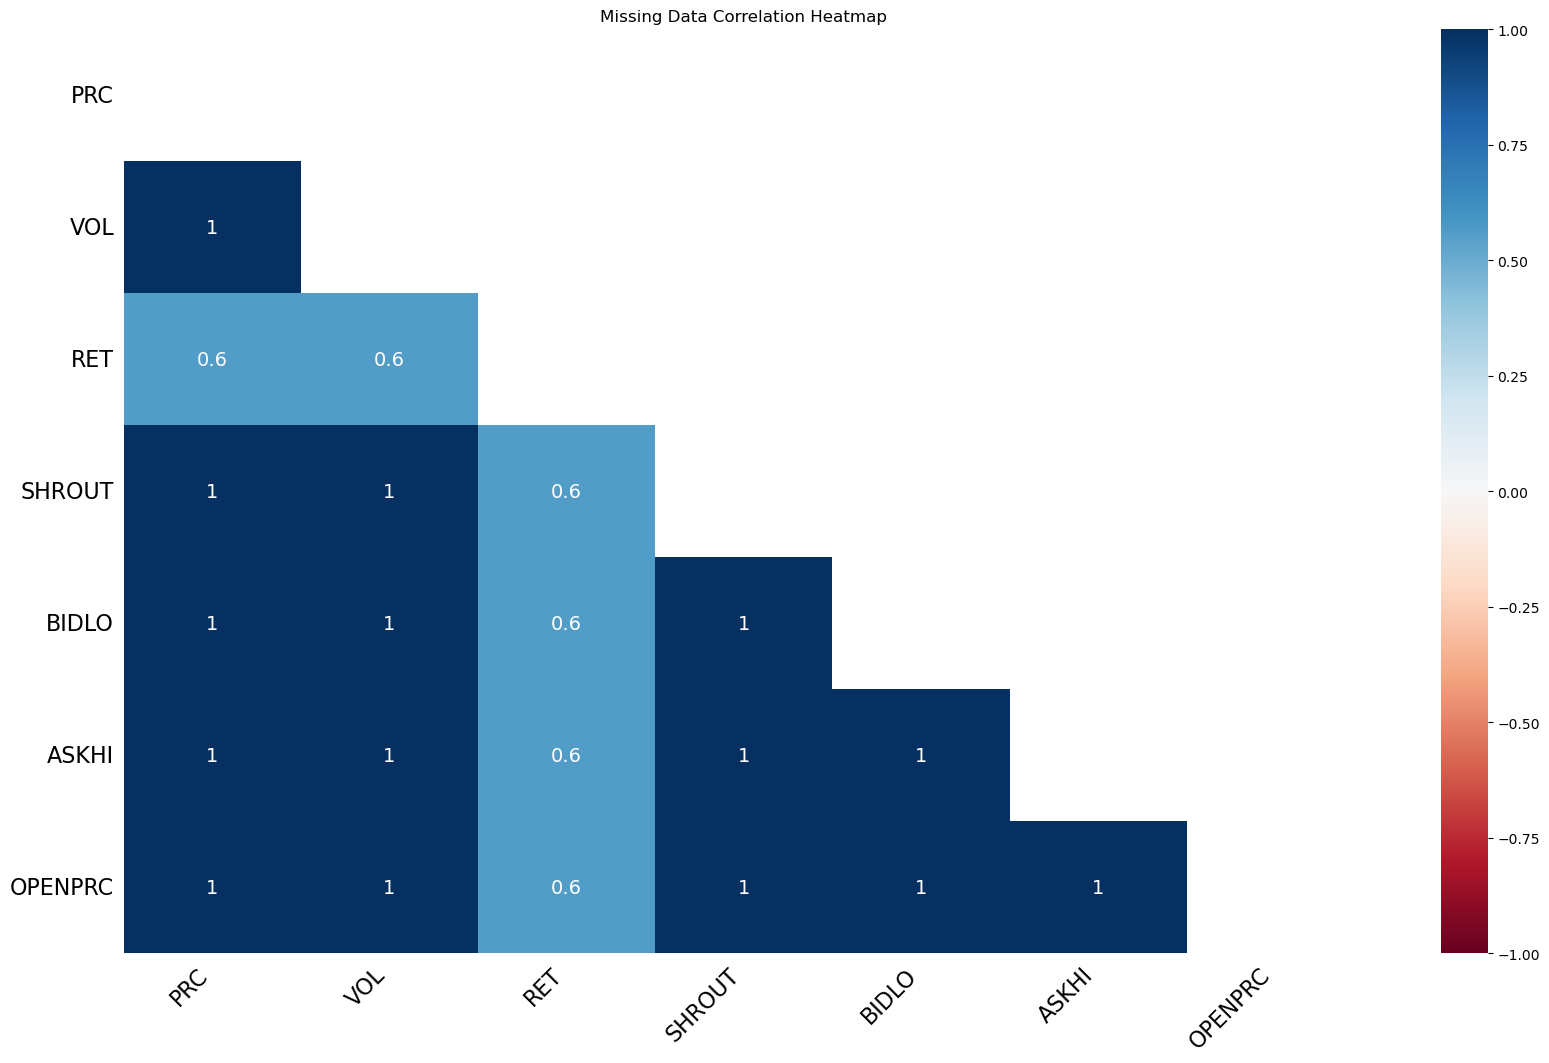

In [69]:
# Check the missing in the data
missing_values = sto_data_selected.isnull().sum()
print(missing_values[missing_values > 0])

# 计算每个变量的缺失值比例
missing_ratios = sto_data_selected.isnull().mean().sort_values(ascending=False)
print("缺失值比例：")
print(missing_ratios[missing_ratios > 0])  # 只显示有缺失值的变量

# 可视化缺失数据的相关性
plt.figure(figsize=(6, 5))
msno.heatmap(sto_data_selected)
plt.title('Missing Data Correlation Heatmap')
plt.show()


In [70]:
# 确保数据按日期排序
sto_data_selected = sto_data_selected.sort_values('date')

# 对价格类数据使用前向填充
price_columns = ['PRC', 'BIDLO', 'ASKHI', 'OPENPRC']
sto_data_selected[price_columns] = sto_data_selected.groupby('TICKER')[price_columns].fillna(method='ffill')

# 对交易量和流通股数使用前向填充
sto_data_selected[['VOL', 'SHROUT']] = sto_data_selected.groupby('TICKER')[['VOL', 'SHROUT']].fillna(method='ffill')

# 重新计算市值
sto_data_selected['market_cap'] = sto_data_selected['PRC'].abs() * sto_data_selected['SHROUT']

# 检查剩余的缺失值
missing_after = sto_data_selected.isnull().sum()
print("处理后的缺失值：")
print(missing_after)


处理后的缺失值：
date           0
TICKER         0
COMNAM         0
SHRCD          0
EXCHCD         0
SICCD          0
PRC            0
VOL            0
RET           19
SHROUT         0
BIDLO          0
ASKHI          0
OPENPRC        0
vwretd         0
ewretd         0
sprtrn         0
market_cap     0
dtype: int64


/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/4253876402.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sto_data_selected[price_columns] = sto_data_selected.groupby('TICKER')[price_columns].fillna(method='ffill')
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/4253876402.py:6: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  sto_data_selected[price_columns] = sto_data_selected.groupby('TICKER')[price_columns].fillna(method='ffill')
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/4253876402.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated 

In [71]:
# sto_data_selected['RET'] = sto_data['RET'] 


In [72]:
# 处理回报率 (RET)
sto_data_selected_temp = pd.DataFrame()
# 方法1：如果可能，基于价格重新计算
sto_data_selected_temp['RET_calc'] = sto_data_selected.groupby('TICKER',group_keys=False)['PRC'].pct_change()

# 方法2：对原始 RET 使用线性插值
sto_data_selected_temp['RET_interp'] = sto_data_selected.groupby('TICKER',group_keys=False)['RET'].apply(lambda x: x.interpolate(method='linear'))

# 合并两种方法的结果
sto_data_selected['RET'] = sto_data_selected['RET'].fillna(sto_data_selected_temp['RET_calc'])
sto_data_selected['RET'] = sto_data_selected['RET'].fillna(sto_data_selected_temp['RET_interp'])
sto_data_selected = sto_data_selected.fillna(method = 'ffill', limit = 10)

print("处理后的缺失值：")
print(sto_data_selected.isnull().sum())
print(sto_data_selected.columns.tolist())


处理后的缺失值：
date          0
TICKER        0
COMNAM        0
SHRCD         0
EXCHCD        0
SICCD         0
PRC           0
VOL           0
RET           0
SHROUT        0
BIDLO         0
ASKHI         0
OPENPRC       0
vwretd        0
ewretd        0
sprtrn        0
market_cap    0
dtype: int64
['date', 'TICKER', 'COMNAM', 'SHRCD', 'EXCHCD', 'SICCD', 'PRC', 'VOL', 'RET', 'SHROUT', 'BIDLO', 'ASKHI', 'OPENPRC', 'vwretd', 'ewretd', 'sprtrn', 'market_cap']


/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/2652446615.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sto_data_selected_temp['RET_calc'] = sto_data_selected.groupby('TICKER',group_keys=False)['PRC'].pct_change()
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/2652446615.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sto_data_selected_temp['RET_interp'] = sto_data_selected.groupby('TICKER',group_keys=False)['RET'].apply(lambda x: x.interpolate(method='linear'))
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/2652446615.py:12: FutureWarning: DataF

In [73]:
sto_data_selected.to_csv('check_sto_data_after_handle_missing_values.csv')

### Feature Computing

In [74]:
sto_featured_data = sto_data_selected.copy()

In [76]:
def reset_indices(df):
    df_reset = df.reset_index()
    df_reset['date'] = pd.to_datetime(df_reset['date'])
    df_reset.set_index(['date', 'TICKER'], inplace=True)
    df_reset.sort_index(inplace=True)
    return df_reset

def calculate_variables(df):
    # 重置索引，确保 'date' 列是 datetime 类型，并设置 'date' 列为索引
    df_reset = df.reset_index()

    # 计算市值
    df['market_cap'] = df['PRC'].abs() * df['SHROUT']

    df['Size'] = np.log(df['market_cap'])

    # Momentum (11-month return, 1 month ago)
    def calculate_momentum(group):
        return group.rolling(window=11).apply(lambda x: (1 + x).prod() - 1).shift(1)

    df['Momentum'] = df.groupby('TICKER')['RET'].transform(calculate_momentum)

    # 短期反转（过去1个月的回报）
    df['ShortTermReversal'] = df.groupby('TICKER')['RET'].shift(1)
    
    # LME (Lagged Market Equity) 上个月月末的总市值
    df['LME'] = df.groupby('TICKER')['market_cap'].shift(21)
    
    # LTurnover 上月总交易量与上月月末总市值的比率
    df['LTurnover'] = df.groupby('TICKER').apply(lambda x: x['VOL'].rolling(window=21).sum() / x['LME']).reset_index(level=0, drop=True)
    
    # 上月美元交易量
    df['DollarVolume'] = df['PRC'].abs() * df['VOL']

    # Spread 上月日均买卖价差
    df['spread'] = (df['ASKHI'] - df['BIDLO']) / ((df['ASKHI'] + df['BIDLO']) / 2)
    df['spread'] = df.groupby('TICKER')['spread'].shift(21)

    # 确保 'RET' 列是数字类型
    df['RET'] = pd.to_numeric(df['RET'], errors='coerce')
    
    # 计算20天滚动标准差
    df['Volatility'] = df.groupby('TICKER')['RET'].transform(lambda x: x.rolling(window=20, min_periods=1).std())
    df['Volatility'] = df['Volatility'].fillna(0)

    # 重置索引
    df_reset = df.reset_index()

    # Beta (simplified version) 用滚动计算
    def calculate_beta(stock_returns, market_returns, window=100):
        return stock_returns.rolling(window=window).apply(lambda x: np.cov(x, market_returns[-window:])[0,1] / np.var(market_returns[-window:]), raw=True)
    
    df_reset['Beta'] = df_reset.groupby('TICKER')['RET'].transform(lambda x: calculate_beta(x, df_reset['sprtrn']))
    
    # 计算Beta平方
    df_reset['BetaSquared'] = df_reset['Beta'] ** 2

    df['Beta'] = df_reset['Beta']
    df['BetaSquared'] = df_reset['BetaSquared']

    # 计算特质波动性
    df_reset['expected_ret'] = df_reset['Beta'] * df_reset['sprtrn']
    df_reset['residuals'] = df_reset['RET'] - df_reset['expected_ret']
    df_reset['idio_vol'] = df_reset.groupby('TICKER')['residuals'].transform(lambda x: x.rolling(window=252, min_periods=1).std())
    df['idio_vol'] = df_reset['idio_vol']

    # 历史回报指标
    df['r2_1'] = df.groupby('TICKER')['RET'].shift(1)

    # 计算 r12_2, r12_7, r36_13
    df_reset['r12_2'] = df_reset.groupby('TICKER')['RET'].rolling(window=11).sum().shift(1).reset_index(0, drop=True)
    df_reset['r12_7'] = df_reset.groupby('TICKER')['RET'].rolling(window=6).sum().shift(6).reset_index(0, drop=True)
    df_reset['r36_13'] = df_reset.groupby('TICKER')['RET'].rolling(window=24).sum().shift(12).reset_index(0, drop=True)

    # 设置回原来的索引
    df_reset.set_index('index', inplace=True)
    
    # 将结果赋值给原始 DataFrame
    df['r12_2'] = df_reset['r12_2']
    df['r12_7'] = df_reset['r12_7']
    df['r36_13'] = df_reset['r36_13']

    df['RET_lag_1_mon'] = df.groupby('TICKER')['RET'].shift(1)

    # Rel to high 接近52周最高价的程度
    df_reset['52_week_high'] = df_reset.groupby('TICKER')['PRC'].rolling(window=252).max().reset_index(0, drop=True)
    
    # 计算 Rel_to_high
    df_reset['Rel_to_high'] = df_reset['PRC'] / df_reset['52_week_high']
    
    # 将结果赋值给原始 DataFrame
    df['52_week_high'] = df_reset['52_week_high']
    df['Rel_to_high'] = df_reset['Rel_to_high']
    
    # SUV (Standardized Unexplained Volume)
    def calculate_suv(volume, window=20):
        log_volume = np.log(volume)
        mean_log_volume = log_volume.rolling(window=window).mean()
        std_log_volume = log_volume.rolling(window=window).std()
        return (log_volume - mean_log_volume) / std_log_volume
    
    df['SUV'] = df.groupby('TICKER')['VOL'].transform(calculate_suv)
    
    return df

# Apply the function to your dataframe
sto_featured_data = calculate_variables(sto_featured_data)


/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/2962688112.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Momentum'] = df.groupby('TICKER')['RET'].transform(calculate_momentum)
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/2962688112.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['ShortTermReversal'] = df.groupby('TICKER')['RET'].shift(1)
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/2962688112.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False

In [77]:
sto_featured_data.to_csv('check_sto_featured_data_after_handle_missing_values.csv')

In [78]:
debug_print_data_info(sto_featured_data)

Data shape: (89589, 36)
Data head:
            date TICKER                      COMNAM SHRCD EXCHCD SICCD  \
0     2014-01-02     KO                COCA COLA CO    11      1  2086   
74493 2014-01-02    SPY  SPDR S & P 500 E T F TRUST    73      4  6726   
54363 2014-01-02      C               CITIGROUP INC    11      1  6021   
46300 2014-01-02    AXP         AMERICAN EXPRESS CO    11      1  6141   
66943 2014-01-02   SIRI     SIRIUS X M HOLDINGS INC    11      3  4832   

          PRC          VOL       RET     SHROUT  ...   BetaSquared  idio_vol  \
0       40.66   12720200.0 -0.000157  4415923.0  ...           NaN       NaN   
74493  182.92  119636800.0 -0.009584   945832.0  ...  5.218089e-07  0.000206   
54363   52.27   16489800.0  0.003070  3033001.0  ...  2.253990e-04  0.000129   
46300   89.45    5120000.0 -0.000141  1071271.0  ...  3.161427e-04  0.001025   
66943    3.50   34370976.0  0.002865  6096221.0  ...  9.945549e-06  0.000194   

       r2_1     r12_2     r12_7    r36_

## Macroeconomic Index

In [79]:
dfy = pd.read_csv('DFY (Default Yield Spread)- 2014 - 2024.csv')
tbl = pd.read_csv('TBL (Treasury Bill Rate) - 2014 - 2024.csv')
tms = pd.read_csv('TMS (Term Spread) - 2014 - 2024.csv')

In [80]:
dfy.info()
tbl.info()
tms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2740 non-null   object
 1   BAA10Y  2740 non-null   object
dtypes: object(2)
memory usage: 42.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    126 non-null    object 
 1   TB3MS   126 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2742 non-null   object
 1   T10Y2Y  2742 non-null   object
dtypes: object(2)
memory usage: 43.0+ KB


In [81]:
def reset_index_as_time(df):
    df_reset = df.reset_index()
    df_reset['date'] = pd.to_datetime(df_reset['date'])
    df_reset.set_index('date', inplace=True)
    df_reset.sort_index(inplace=True)
    return df_reset

tbl = tbl.rename(columns={'DATE': 'date'})
tms = tms.rename(columns={'DATE': 'date'})
dfy = dfy.rename(columns={'DATE': 'date'})

tbl = reset_index_as_time(tbl)
tms = reset_index_as_time(tms)
dfy = reset_index_as_time(dfy)

debug_print_data_info(tbl)
debug_print_data_info(tms)
debug_print_data_info(dfy)

# 检查日期范围
print("\nDate ranges:")
print("tbl:", tbl.index.min(), "to", tbl.index.max())
print("tms:", tms.index.min(), "to", tms.index.max())
print("dfy:", dfy.index.min(), "to", dfy.index.max())



Data shape: (126, 2)
Data head:
            index  TB3MS
date                    
2014-01-01      0   0.04
2014-02-01      1   0.05
2014-03-01      2   0.05
2014-04-01      3   0.03
2014-05-01      4   0.03
Data tail:
            index  TB3MS
date                    
2024-02-01    121   5.24
2024-03-01    122   5.24
2024-04-01    123   5.24
2024-05-01    124   5.25
2024-06-01    125   5.24
Data info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2014-01-01 to 2024-06-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   126 non-null    int64  
 1   TB3MS   126 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.0 KB
None
Missing values:
index    0
TB3MS    0
dtype: int64
['index', 'TB3MS']
Data shape: (2742, 2)
Data head:
            index T10Y2Y
date                    
2014-01-02      0   2.61
2014-01-03      1   2.60
2014-01-06      2   2.58
2014-01-07      3   2.56
2014-01-08      4

In [82]:
# 定义一个函数来安全地转换为浮点数
def safe_float(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

# 将所有列转换为float类型，同时处理无效值
tbl['TB3MS'] = tbl['TB3MS'].apply(safe_float)
tms['T10Y2Y'] = tms['T10Y2Y'].apply(safe_float)
dfy['BAA10Y'] = dfy['BAA10Y'].apply(safe_float)

# 检查转换后的数据
print("tbl head after conversion:")
print(tbl.head())
print("\ntms head after conversion:")
print(tms.head())
print("\ndfy head after conversion:")
print(dfy.head())

tbl head after conversion:
            index  TB3MS
date                    
2014-01-01      0   0.04
2014-02-01      1   0.05
2014-03-01      2   0.05
2014-04-01      3   0.03
2014-05-01      4   0.03

tms head after conversion:
            index  T10Y2Y
date                     
2014-01-02      0    2.61
2014-01-03      1    2.60
2014-01-06      2    2.58
2014-01-07      3    2.56
2014-01-08      4    2.58

dfy head after conversion:
            index  BAA10Y
date                     
2014-01-02      0    2.34
2014-01-03      1    2.34
2014-01-06      2    2.32
2014-01-07      3    2.32
2014-01-08      4    2.31


In [83]:
start_date = max(tbl.index.min(), tms.index.min(), dfy.index.min())
end_date = min(tbl.index.max(), tms.index.max(), dfy.index.max())

def process_econ_data(df):
    # 过滤日期范围
    df = df[(df.index >= start_date) & (df.index <= end_date)]
    
    # 创建一个完整的日期范围
    full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # 重新索引并填充
    # df = df.set_index('date')
    df = df.reindex(full_date_range).fillna(method = 'ffill')
    
    return df.reset_index().rename(columns={'index': 'date'})

# 删除可能存在的多余索引列
columns_to_drop = ['Unnamed: 0', 'level_0', 'index']
tbl = tbl.drop(columns=[col for col in columns_to_drop if col in tbl.columns])
tms = tms.drop(columns=[col for col in columns_to_drop if col in tms.columns])
dfy = dfy.drop(columns=[col for col in columns_to_drop if col in dfy.columns])

tbl_daily = process_econ_data(tbl)
tms_daily = process_econ_data(tms)
dfy_daily = process_econ_data(dfy)

debug_print_data_info(tbl_daily)
debug_print_data_info(tms_daily)
debug_print_data_info(dfy_daily)

# 合并数据
# macro_data = tbl_daily.join(tms_daily, how='outer').join(dfy_daily, how='outer')
# macro_data = macro_data.loc[:, ~macro_data.columns.duplicated()]
macro_data_1 = pd.merge(tbl, tms, on='date', how='outer')
macro_data_2 = pd.merge(macro_data_1, dfy, on='date', how='outer')

# 用前向填充方法处理缺失值
macro_data = macro_data_2.fillna(method = 'ffill')


debug_print_data_info(macro_data)



Data shape: (3804, 2)
Data head:
        date  TB3MS
0 2014-01-02    NaN
1 2014-01-03    NaN
2 2014-01-04    NaN
3 2014-01-05    NaN
4 2014-01-06    NaN
Data tail:
           date  TB3MS
3799 2024-05-28   5.25
3800 2024-05-29   5.25
3801 2024-05-30   5.25
3802 2024-05-31   5.25
3803 2024-06-01   5.24
Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3804 non-null   datetime64[ns]
 1   TB3MS   3774 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.6 KB
None
Missing values:
date      0
TB3MS    30
dtype: int64
['date', 'TB3MS']
Data shape: (3804, 2)
Data head:
        date  T10Y2Y
0 2014-01-02    2.61
1 2014-01-03    2.60
2 2014-01-04    2.60
3 2014-01-05    2.60
4 2014-01-06    2.58
Data tail:
           date  T10Y2Y
3799 2024-05-28   -0.40
3800 2024-05-29   -0.35
3801 2024-05-30   -0.37
380

/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/1332841910.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.reindex(full_date_range).fillna(method = 'ffill')
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/1332841910.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.reindex(full_date_range).fillna(method = 'ffill')
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/1332841910.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.reindex(full_date_range).fillna(method = 'ffill')
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/1332841910.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a 

In [84]:
macro_data.to_csv('check_macro_data_after_handle_missing_data.csv')

## Monthly Data Resample and Merge

### Make sure fin_data and sto_data_selected have the same date range

In [85]:
def set_index_as_time(df): 
    try:
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)
    except:
        pass
    df.sort_index(inplace=True)
    return df

# 读取数据
fin_df = pd.read_csv('check_fin_data_after_handle_missing_values.csv')
sto_df = pd.read_csv('check_sto_featured_data_after_handle_missing_values.csv')
macro_df = pd.read_csv('check_macro_data_after_handle_missing_data.csv')

# 删除可能存在的多余索引列
columns_to_drop = ['Unnamed: 0', 'level_0', 'index']
fin_df = fin_df.drop(columns=[col for col in columns_to_drop if col in fin_df.columns])
sto_df = sto_df.drop(columns=[col for col in columns_to_drop if col in sto_df.columns])
macro_df = macro_df.drop(columns=[col for col in columns_to_drop if col in macro_df.columns])

# Rename date column
fin_df = fin_df.rename(columns={'public_date': 'date'})
sto_df = sto_df.rename(columns={'date': 'date'})

set_index_as_time(fin_df)
set_index_as_time(sto_df)
set_index_as_time(macro_df)


/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/4145659624.py:12: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  sto_df = pd.read_csv('check_sto_featured_data_after_handle_missing_values.csv')


,TB3MS,T10Y2Y,BAA10Y
date,,,
2014-01-01,0.04,NaN,NaN
2014-01-02,0.04,2.61,2.34
2014-01-03,0.04,2.60,2.34
2014-01-06,0.04,2.58,2.32
2014-01-07,0.04,2.56,2.32
...,...,...,...
2024-07-01,5.24,-0.29,1.55
2024-07-02,5.24,-0.31,1.56
2024-07-03,5.24,-0.35,1.53


### Make sure fin_data and sto_data_selected have the same ticker range

In [86]:
fin_tickers = set(fin_df['TICKER'])
stk_tickers = set(sto_df['TICKER'])
common_tickers = fin_tickers.intersection(stk_tickers)

print(f"Financial data tickers: {len(fin_tickers)}")
print(f"Stock data tickers: {len(stk_tickers)}")
print(f"Common tickers: {len(common_tickers)}")

fin_df = fin_df[fin_df['TICKER'].isin(common_tickers)]
sto_df = sto_df[sto_df['TICKER'].isin(common_tickers)]

Financial data tickers: 43
Stock data tickers: 46
Common tickers: 39


In [87]:
debug_print_data_info(fin_df)
debug_print_data_info(sto_df)
debug_print_data_info(macro_df)

# 检查日期范围
print("\nDate ranges:")
print("fin:", fin_df.index.min(), fin_df.index.max())
print("sto:", sto_df.index.min(), sto_df.index.max())
print("macro:", macro_df.index.min(), macro_df.index.max())

fin_df['TICKER'] = fin_df['TICKER'].astype('category')
sto_df['TICKER'] = sto_df['TICKER'].astype('category')

# Period
start_date = max(fin_df.index.min(), sto_df.index.min(), macro_df.index.min())
end_date = min(fin_df.index.max(), sto_df.index.max(), macro_df.index.max())

print("\nStart date:", start_date, "End date:", end_date)

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)


Data shape: (4655, 70)
Data head:
              CAPEI     bm       evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc  \
date                                                                           
2010-01-31   23.091  0.202    12.573        9.688      9.688  10.046  10.046   
2010-01-31   -1.923  0.373    10.345       -7.652     -7.652  -3.660  -3.660   
2010-01-31   43.783  0.203    13.424       20.831     21.152  21.152  21.152   
2010-01-31   13.380  0.491     7.519       24.791     24.870  26.201  26.289   
2010-01-31  156.831  0.465 -1987.300      -17.493    -17.493 -17.374 -17.374   

               ps      pcf    dpr  ...  sale_equity  sale_nwc  rd_sale  \
date                               ...                                   
2010-01-31  4.107   15.381  0.734  ...        1.388    15.193    0.000   
2010-01-31  1.351   10.299  0.193  ...       23.922     6.851    0.018   
2010-01-31  4.059   17.144  0.000  ...        1.356     2.140    0.031   
2010-01-31  4.273   10.002  0.435  

In [88]:
def resample_as_monthly(df):
    df = df.reset_index()
    # 过滤日期范围
    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # 对于每个TICKER，保留每个月的最后一天数据
    df = df.sort_values(['TICKER', 'date']).groupby(['TICKER', pd.Grouper(key='date', freq='M')]).last().reset_index()
    
    # 创建一个完整的月份范围
    full_date_range = pd.date_range(start=start_date, end=end_date, freq='M')
    
    # 为每个TICKER创建完整的月份范围
    tickers = df['TICKER'].unique()
    full_index = pd.MultiIndex.from_product([tickers, full_date_range], names=['TICKER', 'date'])
    
    # 重新索引并填充
    df = df.set_index(['TICKER', 'date'])
    df = df.reindex(full_index).groupby(level=0).ffill()
    
    return df.reset_index()

fin_monthly = fin_df.copy()
sto_monthly = sto_df.copy()
macro_monthly = macro_df.copy()

# 应用处理函数
fin_monthly = resample_as_monthly(fin_monthly)
stk_monthly = resample_as_monthly(sto_monthly)

# 处理宏观经济数据
macro_monthly = (macro_monthly[start_date:end_date]
                 .resample('M')
                 .last()
                 .reset_index())

# 合并数据
combined_df = pd.merge(stk_monthly, fin_monthly, on=['TICKER', 'date'], how='inner')

# 合并宏观经济数据
combined_df_with_macro = pd.merge(combined_df, macro_monthly, on='date', how='inner')

# 确保没有重复的列名
combined_df_with_macro = combined_df_with_macro.loc[:, ~combined_df_with_macro.columns.duplicated()]

debug_print_data_info(combined_df_with_macro)

# 保存处理后的数据
combined_df_with_macro.to_csv('check_monthly_combined_data_after_handle_missing_values.csv', index=False)


/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/4283561154.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.sort_values(['TICKER', 'date']).groupby(['TICKER', pd.Grouper(key='date', freq='M')]).last().reset_index()
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/4283561154.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.sort_values(['TICKER', 'date']).groupby(['TICKER', pd.Grouper(key='date', freq='M')]).last().reset_index()
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/4283561154.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_date_range = pd.date_range(start=start_date, end=end_date, freq='M')
/var/fold

Data shape: (4641, 108)
Data head:
  TICKER       date     COMNAM  SHRCD  EXCHCD SICCD        PRC         VOL  \
0   AAPL 2014-01-31  APPLE INC   11.0     3.0  3571  500.60001  18220292.0   
1   AAPL 2014-02-28  APPLE INC   11.0     3.0  3571  526.23999  13296879.0   
2   AAPL 2014-03-31  APPLE INC   11.0     3.0  3571  536.73999   6023884.0   
3   AAPL 2014-04-30  APPLE INC   11.0     3.0  3571  590.09003  16317269.0   
4   AAPL 2014-05-31  APPLE INC   11.0     3.0  3571  633.00000  20143668.0   

        RET    SHROUT  ...  rd_sale  adv_sale  staff_sale  accrual    ptb  \
0  0.000016  891989.0  ...    0.026     0.006         0.0   -0.087  3.189   
1 -0.000027  891989.0  ...    0.028     0.006         0.0   -0.078  3.172   
2 -0.000002  861745.0  ...    0.000     0.027         0.0   -0.050  2.257   
3 -0.000038  861381.0  ...    0.028     0.006         0.0   -0.078  3.435   
4 -0.000037  861381.0  ...    0.029     0.006         0.0   -0.079  3.904   

   PEG_trailing  divyield  TB3MS 

/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/4283561154.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_date_range = pd.date_range(start=start_date, end=end_date, freq='M')
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/4283561154.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.reindex(full_index).groupby(level=0).ffill()
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/4283561154.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


## Daily Data Resample and Merge

In [89]:
# 处理财务数据
def resample_as_daily(df):
    df = df.reset_index()
    # 过滤日期范围
    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # 对于每个TICKER，保留每个日期的最新数据
    df = df.sort_values(['TICKER', 'date']).groupby(['TICKER', 'date']).last().reset_index()
    
    # 创建一个完整的日期范围
    full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # 为每个TICKER创建完整的日期范围
    tickers = df['TICKER'].unique()
    full_index = pd.MultiIndex.from_product([tickers, full_date_range], names=['TICKER', 'date'])
    
    # 重新索引并填充
    df = df.set_index(['TICKER', 'date'])
    df = df.reindex(full_index).groupby(level=0).ffill()
    
    return df.reset_index()

fin_daily = fin_df.copy()
sto_daily = sto_df.copy()
econ_daily = macro_df.copy()

# 应用处理函数
fin_daily = resample_as_daily(fin_df)
stk_daily = resample_as_daily(sto_df)

debug_print_data_info(fin_daily)
debug_print_data_info(stk_daily)

# 合并数据
combined_df_daily = pd.merge(stk_daily, fin_daily, on=['TICKER', 'date'], how='inner')

print(combined_df_daily.head())
print(combined_df_daily.columns)

econ_daily = econ_daily.reset_index()

debug_print_data_info(econ_daily)

# 合并宏观经济数据
combined_df_with_stock_daily = pd.merge(combined_df_daily, econ_daily, on='date', how='inner')

# 确保没有重复的列名
combined_df_with_stock_daily = combined_df_with_stock_daily.loc[:, ~combined_df_with_stock_daily.columns.duplicated()]

debug_print_data_info(combined_df_with_stock_daily)

# 保存处理后的数据
combined_df_with_stock_daily.to_csv('check_daily_combined_data_after_handle_missing_values.csv', index=False)



/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/1972376601.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.sort_values(['TICKER', 'date']).groupby(['TICKER', 'date']).last().reset_index()
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/1972376601.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.reindex(full_index).groupby(level=0).ffill()
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_44414/1972376601.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fal

Data shape: (142311, 71)
Data head:
  TICKER       date  CAPEI  bm  evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc  \
0   AAPL 2014-01-02    NaN NaN  NaN          NaN        NaN     NaN     NaN   
1   AAPL 2014-01-03    NaN NaN  NaN          NaN        NaN     NaN     NaN   
2   AAPL 2014-01-04    NaN NaN  NaN          NaN        NaN     NaN     NaN   
3   AAPL 2014-01-05    NaN NaN  NaN          NaN        NaN     NaN     NaN   
4   AAPL 2014-01-06    NaN NaN  NaN          NaN        NaN     NaN     NaN   

   ps  ...  sale_invcap  sale_equity  sale_nwc  rd_sale  adv_sale  staff_sale  \
0 NaN  ...          NaN          NaN       NaN      NaN       NaN         NaN   
1 NaN  ...          NaN          NaN       NaN      NaN       NaN         NaN   
2 NaN  ...          NaN          NaN       NaN      NaN       NaN         NaN   
3 NaN  ...          NaN          NaN       NaN      NaN       NaN         NaN   
4 NaN  ...          NaN          NaN       NaN      NaN       NaN         NaN   

  